In [172]:
import matplotlib.pyplot as plt 
import numpy as np 
import pandas
import plotly.express as px
from windrose import WindroseAxes

import xlwings as xw

In [173]:
wb = xw.Book("Book1_WIND.xlsx")

var_sheet = wb.sheets['wind_characterisation']

z_0 = var_sheet.range('E7').value
z_1 = var_sheet.range('E4').value
z_2 = var_sheet.range('E8').value



# #z_0 = 0.0308
# z_1 = 61 # E4
# z_2 = 91.5 # e8

In [174]:
site_list = ['Albemarle', 'Boulmer', 'Charterhall', 'Gogarbank', 'Leuchars', 'Redesdale']

# 'Penmanshiel'

df_P_2016 = pandas.read_excel(f'./datasets/Penmanshiel.xlsx' , sheet_name=0)
df_P_2017 = pandas.read_excel(f'./datasets/Penmanshiel.xlsx' , sheet_name=1)




In [175]:

# Charterhall has 2013-2022

df_C_0= pandas.read_excel(f'./datasets/{site_list[2]}.xlsx' , sheet_name=0)
df_C_1= pandas.read_excel(f'./datasets/{site_list[2]}.xlsx' , sheet_name=1)
df_C_2= pandas.read_excel(f'./datasets/{site_list[2]}.xlsx' , sheet_name=2)
df_C_3 = pandas.read_excel(f'./datasets/{site_list[2]}.xlsx' , sheet_name=3)
df_C_4 = pandas.read_excel(f'./datasets/{site_list[2]}.xlsx' , sheet_name=4)
df_C_5 = pandas.read_excel(f'./datasets/{site_list[2]}.xlsx' , sheet_name=5)
df_C_6 = pandas.read_excel(f'./datasets/{site_list[2]}.xlsx' , sheet_name=6)
df_C_7 = pandas.read_excel(f'./datasets/{site_list[2]}.xlsx' , sheet_name=7)
df_C_8 = pandas.read_excel(f'./datasets/{site_list[2]}.xlsx' , sheet_name=8)
df_C_9 = pandas.read_excel(f'./datasets/{site_list[2]}.xlsx' , sheet_name=9)


In [176]:
df_C_5

,ob_end_time,mean_wind_dir (degrees),mean_wind_speed (knots)
0,2018-01-01 00:00:00,250.0,10.0
1,2018-01-01 01:00:00,240.0,8.0
2,2018-01-01 02:00:00,210.0,12.0
3,2018-01-01 03:00:00,220.0,11.0
4,2018-01-01 04:00:00,230.0,11.0
...,...,...,...
8750,2018-12-31 20:00:00,240.0,20.0
8751,2018-12-31 21:00:00,240.0,17.0
8752,2018-12-31 22:00:00,250.0,15.0
8753,2018-12-31 23:00:00,250.0,16.0


In [177]:
list_df = [df_C_0, df_C_1, df_C_2, df_C_3, df_C_4, df_C_5, df_C_6, df_C_7, df_C_8, df_C_9]

years_list = [2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020, 2021, 2022]

for index, df in enumerate(list_df):
    list_df[index].columns = ['datetime', 'mean_wind_dir', 'mean_speed_knots'] # for standardisation 
    list_df[index] = list_df[index][:-1] # removes 'end data' row

    #df['year'] = years_list[index]


    #list_df[i]["mean_speed_ms"] = (list_df[i]['mean_speed_knots'] * (1 / 1.94384)) does not work
    


means_list = []

for df in list_df:
    means_list.append(df['mean_speed_knots'].mean())
    df = df.dropna()

mean_all_years = (sum(means_list)) / (len(means_list))

mean_all_years = mean_all_years * (1 / 1.94384)  # converting from knots to m/s

mean_all_years

4.475626228704344

In [178]:
# regression line between P and C is y = 1.11x + 2.70

m = 1.11
c = 2.70

P_mean = ((mean_all_years) * m ) + c

P_mean # predicted mean for Penmanshiel

7.667945113861822

In [179]:
df_P_2017.columns = ['datetime', 'mean_speed_ms', 'speed_std', 'mean_wind_dir']


In [180]:
# getting the rayleigh graph 

df_P_2017['mean_speed_ms_rounded'] = df_P_2017['mean_speed_ms'].round()

df_P_2017_vcounts = df_P_2017['mean_speed_ms_rounded'].value_counts().reset_index(drop = False)

totalcounts = df_P_2017_vcounts['count'].sum()
totalcounts

df_P_2017_vcounts['rel_freq'] = df_P_2017_vcounts['count'] / totalcounts

df_P_2017_vcounts['rel_freq_hours'] = df_P_2017_vcounts['rel_freq'] * 8760

df_P_2017_vcounts = df_P_2017_vcounts.sort_values(by = "mean_speed_ms_rounded", ascending=True)
df_P_2017_vcounts = df_P_2017_vcounts.reset_index(drop = True)


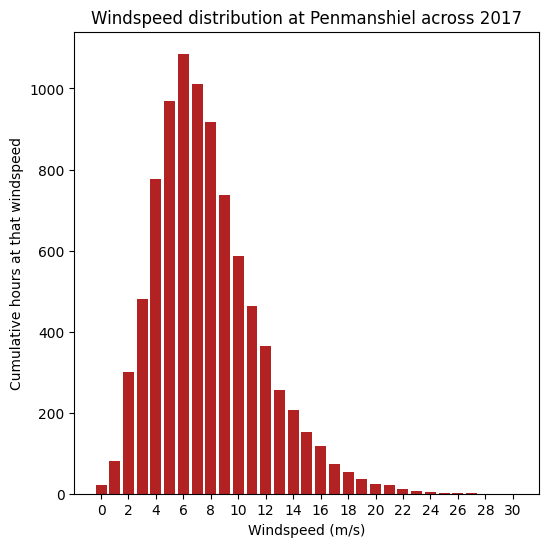

In [181]:
fig, ax = plt.subplots(figsize = (6, 6))

x = df_P_2017_vcounts["mean_speed_ms_rounded"]
y = df_P_2017_vcounts['rel_freq_hours']

plt.xticks(np.arange(0, len(x), 2))
plt.title("Windspeed distribution at Penmanshiel across 2017")
plt.xlabel("Windspeed (m/s)")
plt.ylabel("Cumulative hours at that windspeed")

fig = plt.bar(x, y, color = 'firebrick')

plt.savefig("windspeed_distribution_penmanshiel_2017.png")



In [182]:
U = np.arange(0, df_P_2017['mean_speed_ms'].max(), 1)

In [183]:
mean_2017 = df_P_2017['mean_speed_ms'].mean()
mean_2017

7.735113373800476

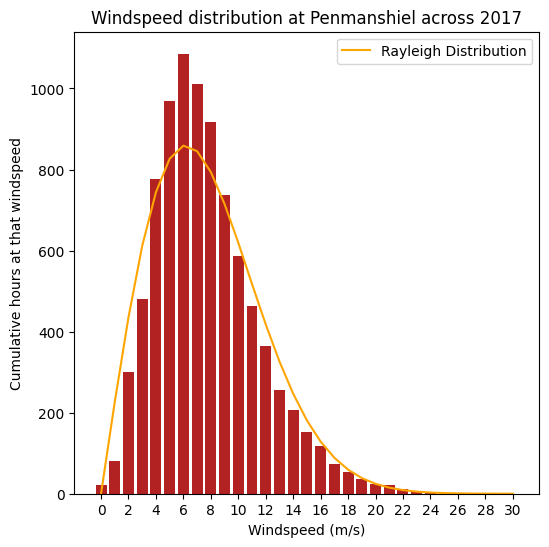

In [184]:
U = np.arange(0, df_P_2017['mean_speed_ms'].max(), 1)
mean_2017 = df_P_2017['mean_speed_ms'].mean()

k = 2
c = 1.13 * mean_2017

df_P_2017_vcounts["R"] = ((k/c) * ((U / c)**(k-1)) * np.exp(-(U/c)**k)) * 8760


x = np.arange(0, len(df_P_2017_vcounts))

fig, ax = plt.subplots(figsize = (6, 6))

x = df_P_2017_vcounts["mean_speed_ms_rounded"]
y = df_P_2017_vcounts['rel_freq_hours']


ax.bar(x, y, color = 'firebrick')

# cannot plot both of these simoultaneously 

ax.plot(x, df_P_2017_vcounts["R"], label = 'Rayleigh Distribution', c = 'orange')
plt.legend()
ax.set_xticks(np.arange(0, len(x), 2))
ax.set_title("Windspeed distribution at Penmanshiel across 2017")
ax.set_xlabel("Windspeed (m/s)")
ax.set_ylabel("Cumulative hours at that windspeed")

plt.savefig("windspeed_distribution_penmanshiel_2017_withR.png")




In [185]:
df_C_0

,datetime,mean_wind_dir,mean_speed_knots
0,2013-01-01 00:00:00,230.0,7.0
1,2013-01-01 01:00:00,240.0,11.0
2,2013-01-01 02:00:00,240.0,10.0
3,2013-01-01 03:00:00,230.0,11.0
4,2013-01-01 04:00:00,220.0,9.0
...,...,...,...
8756,2013-12-31 20:00:00,170.0,11.0
8757,2013-12-31 21:00:00,190.0,11.0
8758,2013-12-31 22:00:00,180.0,7.0
8759,2013-12-31 23:00:00,180.0,6.0


In [186]:
list_df = [df_C_0, df_C_1, df_C_2, df_C_3, df_C_4, df_C_5, df_C_6, df_C_7, df_C_8, df_C_9]

mean_list_C = []

for df in list_df:
    mean_list_C.append((df['mean_speed_knots'].mean()) * (1 / 1.94384))


P90_df = pandas.DataFrame(data = mean_list_C, columns=['mean_C'])
P90_df['year'] = years_list

P90_df = P90_df.sort_values(by = 'mean_C').reset_index(drop = True)


P90_df

,mean_C,year
0,4.049837,2021
1,4.276077,2016
2,4.296456,2019
3,4.360416,2018
4,4.415110,2014
5,4.470792,2017
6,4.547516,2022
7,4.692202,2013
8,4.719176,2020
9,4.928679,2015


In [187]:
# regression line between P and C is y = 1.11x + 2.70

m = 1.11
c = 2.70

P90_df['mean_P'] = (P90_df['mean_C'] * m ) + c

P90_df


,mean_C,year,mean_P
0,4.049837,2021,7.195319
1,4.276077,2016,7.446446
2,4.296456,2019,7.469066
3,4.360416,2018,7.540062
4,4.415110,2014,7.600772
5,4.470792,2017,7.662579
6,4.547516,2022,7.747743
7,4.692202,2013,7.908344
8,4.719176,2020,7.938286
9,4.928679,2015,8.170834


In [188]:


P90_df['mean_P_scaled'] = (np.log(z_2/z_0) / (np.log(z_1/z_0))) * P90_df['mean_P']


P90_df['rank'] = P90_df['mean_P_scaled'].rank(ascending=False)

totalyears = len(P90_df)

P90_df['exc_prob'] = (P90_df['rank'] / (totalyears+1) * 100
)
P90_df

,mean_C,year,mean_P,mean_P_scaled,rank,exc_prob
0,4.049837,2021,7.195319,7.579573,10.0,90.909091
1,4.276077,2016,7.446446,7.844110,9.0,81.818182
2,4.296456,2019,7.469066,7.867939,8.0,72.727273
3,4.360416,2018,7.540062,7.942725,7.0,63.636364
4,4.415110,2014,7.600772,8.006678,6.0,54.545455
5,4.470792,2017,7.662579,8.071786,5.0,45.454545
6,4.547516,2022,7.747743,8.161497,4.0,36.363636
7,4.692202,2013,7.908344,8.330676,3.0,27.272727
8,4.719176,2020,7.938286,8.362216,2.0,18.181818
9,4.928679,2015,8.170834,8.607183,1.0,9.090909


In [189]:
P90_df_named = P90_df.copy()

P90_df_named.columns = ["Mean Wind Speed at Charterhall (m/s)", "Year", "Estimated Mean Wind Speed at Penmanshiel (m/s)", f"Penmanshiel Scaled to new hub height ({z_2})", "Rank", "Exceedance Probability"]

cols = list(P90_df_named.columns)
cols.insert(0, cols.pop(cols.index('Year')))

P90_df_named = P90_df_named[cols]

P90_df_named

,Year,Mean Wind Speed at Charterhall (m/s),Estimated Mean Wind Speed at Penmanshiel (m/s),Penmanshiel Scaled to new hub height (91.5),Rank,Exceedance Probability
0,2021,4.049837,7.195319,7.579573,10.0,90.909091
1,2016,4.276077,7.446446,7.844110,9.0,81.818182
2,2019,4.296456,7.469066,7.867939,8.0,72.727273
3,2018,4.360416,7.540062,7.942725,7.0,63.636364
4,2014,4.415110,7.600772,8.006678,6.0,54.545455
5,2017,4.470792,7.662579,8.071786,5.0,45.454545
6,2022,4.547516,7.747743,8.161497,4.0,36.363636
7,2013,4.692202,7.908344,8.330676,3.0,27.272727
8,2020,4.719176,7.938286,8.362216,2.0,18.181818
9,2015,4.928679,8.170834,8.607183,1.0,9.090909


In [190]:
P90_df

,mean_C,year,mean_P,mean_P_scaled,rank,exc_prob
0,4.049837,2021,7.195319,7.579573,10.0,90.909091
1,4.276077,2016,7.446446,7.844110,9.0,81.818182
2,4.296456,2019,7.469066,7.867939,8.0,72.727273
3,4.360416,2018,7.540062,7.942725,7.0,63.636364
4,4.415110,2014,7.600772,8.006678,6.0,54.545455
5,4.470792,2017,7.662579,8.071786,5.0,45.454545
6,4.547516,2022,7.747743,8.161497,4.0,36.363636
7,4.692202,2013,7.908344,8.330676,3.0,27.272727
8,4.719176,2020,7.938286,8.362216,2.0,18.181818
9,4.928679,2015,8.170834,8.607183,1.0,9.090909


In [211]:
wb = xw.Book("Book1_WIND.xlsx")
P90_sheet = wb.sheets[f'P90 Calculations']
P90_sheet.range('C10').options(index=False, header = True).value = P90_df_named

Text(0, 0.5, 'Exceedance Probability')

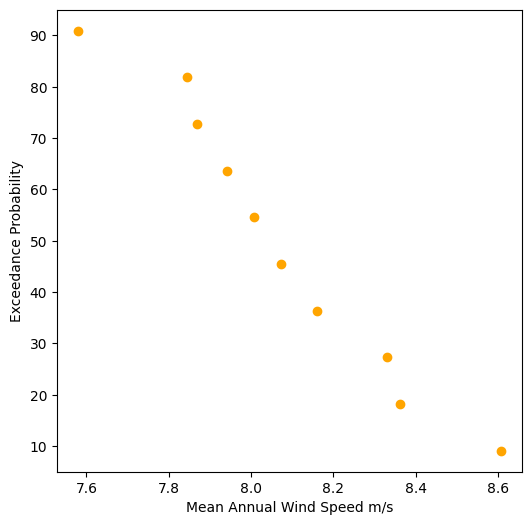

In [200]:
fig, ax = plt.subplots(figsize = (6, 6))

x = P90_df['mean_P_scaled']
y = P90_df['exc_prob']

ax.scatter(x, y, color = 'orange')
ax.set_xlabel("Mean Annual Wind Speed Scaled m/s")
ax.set_ylabel("Exceedance Probability")

In [228]:
number_years = len(P90_df)
mean_p90_df = P90_df['mean_P_scaled'].mean()
sd_p90_df = P90_df['mean_P'].std()

# p90 as a number of std = 1.282

p90_std_num = 1.282

P90_windspeed = mean_p90_df - (p90_std_num * sd_p90_df)

P90_windspeed


# assign to the spreadsheet
P90_sheet.range('K14').value = P90_windspeed
P90_sheet.range('K13').value = p90_std_num




In [202]:
# if we assume that the variation in wind speeds from one year to another is normally distributed, then we can fit a normal curve

from scipy.stats import norm

windspeeds = np.arange((P90_windspeed-1), P90_df['mean_P_scaled'].max(), 0.05)

windspeeds_df = pandas.DataFrame(data = windspeeds, columns = ['windspeeds'])

windspeeds_df['num_std_from_mean'] = (windspeeds_df['windspeeds'] - mean_p90_df) / sd_p90_df

windspeeds_df['percentile']  = norm.cdf(windspeeds_df['num_std_from_mean'])

windspeeds_df['Exceedance'] = 1 - windspeeds_df['percentile']

# just to get an idea
windspeeds_df[:-30]


,windspeeds,num_std_from_mean,percentile,Exceedance
0,6.714073,-4.810128,7.541689e-07,0.999999
1,6.764073,-4.633721,1.795751e-06,0.999998
2,6.814073,-4.457315,4.149629e-06,0.999996
3,6.864073,-4.280909,9.306586e-06,0.999991
4,6.914073,-4.104502,2.025931e-05,0.999980
5,6.964073,-3.928096,4.281054e-05,0.999957
6,7.014073,-3.751690,8.782346e-05,0.999912
7,7.064073,-3.575283,1.749246e-04,0.999825


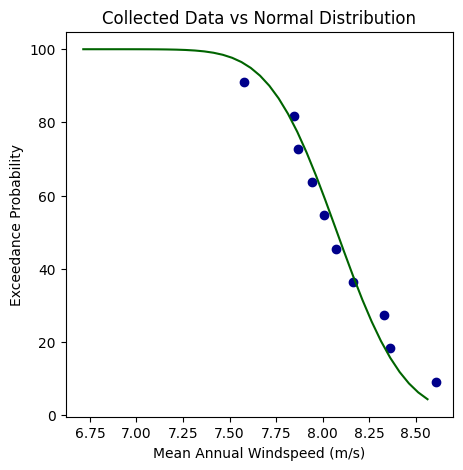

In [212]:
fig, ax = plt.subplots(figsize = (5, 5))

x = windspeeds_df['windspeeds']
y = windspeeds_df['Exceedance'] * 100

ax.plot(x, y, c = 'darkgreen')

x = P90_df['mean_P_scaled']
y = P90_df['exc_prob']

ax.scatter(x, y, color = 'darkblue')

ax.set_xlabel("Mean Annual Windspeed (m/s)")
ax.set_ylabel("Exceedance Probability")
ax.set_title("Collected Data vs Normal Distribution")

plt.savefig('normal_dist_p90.png')  # Save the plot as a PNG file


In [218]:
left = P90_sheet.range('B37').left  # X-coordinate (horizontal position)
top = P90_sheet.range('B37').top   # Y-coordinate (vertical position)
width = 700           # Width of the image
# height = 300


P90_sheet.pictures.add('normal_dist_p90.png', name = 'normal_dist', update = True, left=left, top=top)

<Picture 'normal_dist' in <Sheet [Book1_WIND.xlsx]P90 Calculations>>

In [196]:
# finding the P90 Rayleigh distribution 

mean_for_c = P90_windspeed

k = 2
c = 1.13 * mean_for_c

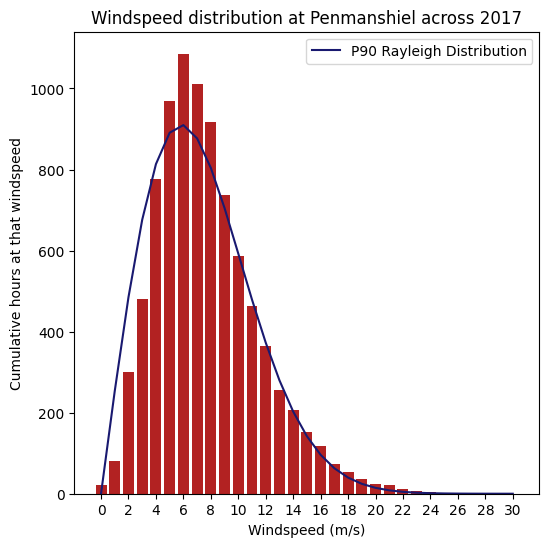

In [197]:
U = np.arange(0, df_P_2017['mean_speed_ms'].max(), 1)

k = 2
c = 1.13 * mean_for_c

df_P_2017_vcounts["R_P90"] = ((k/c) * ((U / c)**(k-1)) * np.exp(-(U/c)**k)) * 8760


x = np.arange(0, len(df_P_2017_vcounts))

fig, ax = plt.subplots(figsize = (6, 6))

x = df_P_2017_vcounts["mean_speed_ms_rounded"]
y = df_P_2017_vcounts['rel_freq_hours']


ax.bar(x, y, color = 'firebrick')

# cannot plot both of these simoultaneously 

ax.plot(x, df_P_2017_vcounts["R_P90"], label = 'P90 Rayleigh Distribution', c = 'midnightblue')
plt.legend()
ax.set_xticks(np.arange(0, len(x), 2))
ax.set_title("Windspeed distribution at Penmanshiel across 2017")
ax.set_xlabel("Windspeed (m/s)")
ax.set_ylabel("Cumulative hours at that windspeed")

plt.savefig("windspeed_distribution_penmanshiel_2017_withR_P90.png")



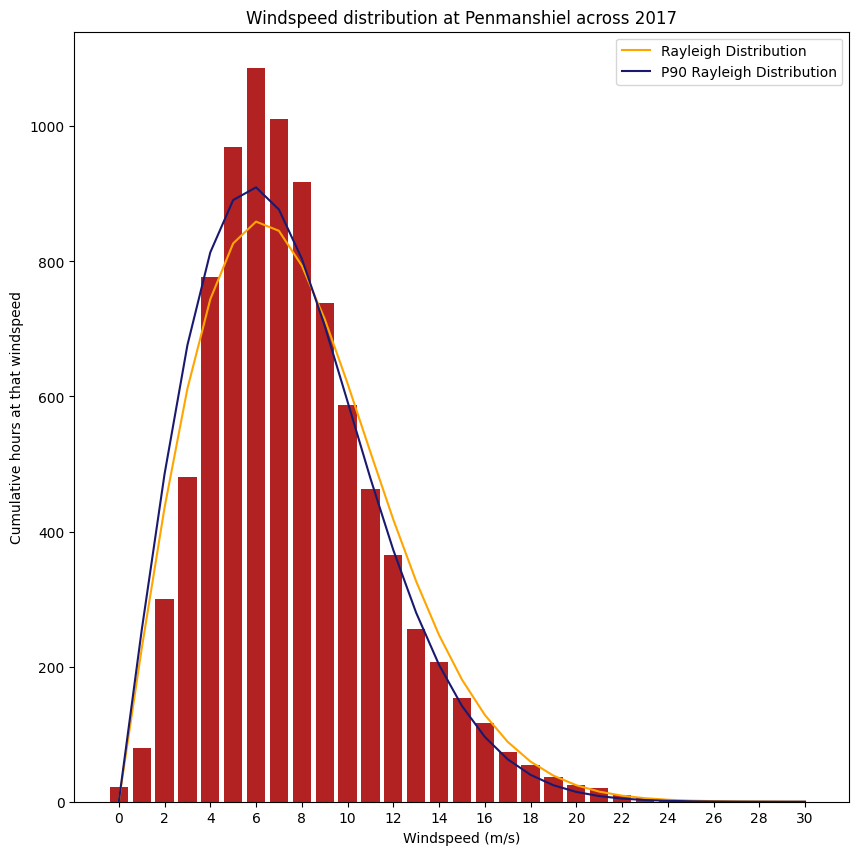

In [222]:
U = np.arange(0, df_P_2017['mean_speed_ms'].max(), 1)

k = 2
c = 1.13 * mean_for_c

df_P_2017_vcounts["R_P90"] = ((k/c) * ((U / c)**(k-1)) * np.exp(-(U/c)**k)) * 8760


x = np.arange(0, len(df_P_2017_vcounts))

fig, ax = plt.subplots(figsize = (10, 10))

x = df_P_2017_vcounts["mean_speed_ms_rounded"]
y = df_P_2017_vcounts['rel_freq_hours']


ax.bar(x, y, color = 'firebrick')

# cannot plot both of these simoultaneously 
ax.plot(x, df_P_2017_vcounts["R"], label = 'Rayleigh Distribution', c = 'orange')
ax.plot(x, df_P_2017_vcounts["R_P90"], label = 'P90 Rayleigh Distribution', c = 'midnightblue')
plt.legend()
ax.set_xticks(np.arange(0, len(x), 2))
ax.set_title("Windspeed distribution at Penmanshiel across 2017")
ax.set_xlabel("Windspeed (m/s)")
ax.set_ylabel("Cumulative hours at that windspeed")

plt.savefig("windspeed_distribution_penmanshiel_2017_withR_P90_comp.png")


In [224]:
left = P90_sheet.range('E37').left  # X-coordinate (horizontal position)
top = P90_sheet.range('E37').top   # Y-coordinate (vertical position)
width = 700           # Width of the image
# height = 300


P90_sheet.pictures.add('windspeed_distribution_penmanshiel_2017_withR_P90_comp.png', name = 'p90_dist', update = True, left=left, top=top)

<Picture 'p90_dist' in <Sheet [Book1_WIND.xlsx]P90 Calculations>>

In [199]:
print(f"Mean before P90 was {mean_2017}, mean used for P90 Rayleigh is {mean_for_c}")

Mean before P90 was 7.735113373800476, mean used for P90 Rayleigh is 7.304579598715103


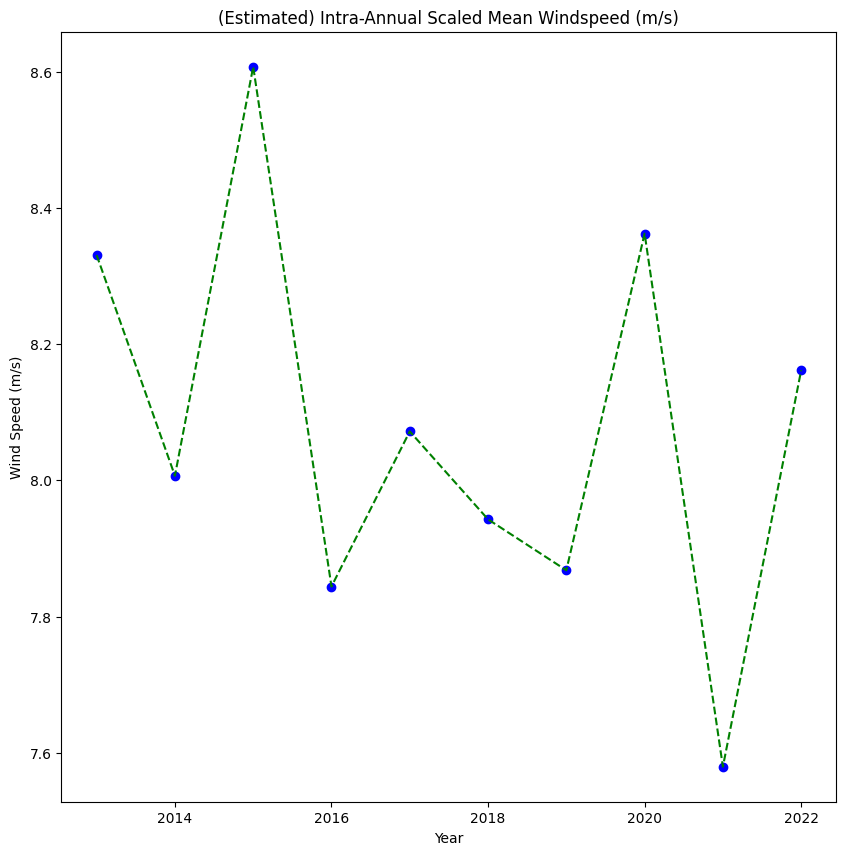

In [240]:
P90_df_sorted = P90_df.sort_values(by = "year")
P90_df_sorted


fig, ax = plt.subplots(figsize = (10, 10))

plt.scatter(P90_df_sorted['year'], P90_df_sorted['mean_P_scaled'], c= 'b')
plt.plot(P90_df_sorted['year'], P90_df_sorted['mean_P_scaled'], '--', c = 'g')
plt.title("(Estimated) Intra-Annual Scaled Mean Windspeed (m/s)")
plt.xlabel("Year")
plt.ylabel("Wind Speed (m/s)")

plt.savefig("intra_annual_variation.png")



In [241]:
left = P90_sheet.range('H34').left  # X-coordinate (horizontal position)
top = P90_sheet.range('H34').top  

P90_sheet.pictures.add("intra_annual_variation.png", name = 'intra_annual', update = True, left=left, top=top)

<Picture 'intra_annual' in <Sheet [Book1_WIND.xlsx]P90 Calculations>>